# Lot Rakiety

https://qabrio.pl/python-matplotlib-pyplot-jak-generowac-wykresy-2/
strona jak robić wykresy 

In [8]:
from IPython.display import Latex


***Wstęp.*** 

Modelowanie lotu rakiety stało się kluczową sprawą obronności, jak i sił ofensywnych.
Rakiety, jako potężne narzędzia technologiczne, zdolne do pokonywania grawitacyjnych ograniczeń i osiągania kosmicznych odległości, zyskały szczególne znaczenie w okresie powojennym, zwłaszcza po zakończeniu II wojny światowej. Jedną z kluczowych postaci w rozwoju tej technologii był niemiecki inżynier Wernher von Braun [[6,7](#bibliografia)], który swoimi osiągnięciami przyczynił się do znacznego postępu w dziedzinie rakietowej.
Po II wojnie światowej, świat wszedł w nową erę, w której naukowcy i inżynierowie zaczęli skupiać swoją uwagę na zastosowaniach militarnych i kosmicznych rakiet. W tym kontekście, Wernher von Braun, wcześniej związany z niemieckim programem rakietowym (rakieta V2), stał się kluczową postacią w amerykańskim programie kosmicznym.
W ramach operacji "Paperclip", która miała na celu pozyskanie niemieckich naukowców do pracy dla Stanów Zjednoczonych, von Braun i jego zespół przeszli do Ameryki, gdzie włączyli się w prace nad rozwojem rakiet balistycznych i kosmicznych. Jego najbardziej znaczącym osiągnięciem było stworzenie rakiety Redstone, a później rakiet nośnych serii Saturn, które były kluczowe dla osiągnięcia celu narodowego – umieszczenia pierwszego człowieka na Księżycu.

Niestety, rakiety nie przestały pełnić swojego pierwotnego śmiercionośnego celu, więc nie jesteśmy w stanie jednoznacznie opowiedzieć się jako zwolennicy, albo przeciwnicy [czego?], ponieważ rakieta zaprowadziła człowieka na księżyć, jak i jest w stanie przenosić ładunki nuklearne, mogące zneutralizować całą ludzkość.

Współcześnie rakiety pełnią kluczową role. Już za czasów Ronalda Reagan’a, który rozpoczął tak zwane: „Gwiezde wojny”(co nawiązuje do serii J.Luasa), czyli morderczy wyścig zbrojeń, który został narzucony na Związek Radziecki, za pośrednictwem którego ZSRR było zmuszone przeznaczać do 20% PKB na zbrojenia. Gwiezdne wojny to był blef, ale Sowieci, obawiając się śmiercionośnej siły rakiet, musieli dołączyć się do „wyścigu”.

W niniejszym opracowaniu skoncentrujemy się na fizyce i matematyce stojącej za lotem rakiety. Prześledzimy kluczowe fazy lotu rakiety, oraz prawa fizyki stojące za takim, a nie innym jej działaniem, dokonamy koniecznych uproszczeń, abyśmy mogli dokonać potrzebnych obliczeń i porównań naszego modelu, ze znacznie lepszym i "prawdziwszym", opracowanym przez naukowców.

Poniżej rysunek pomocniczy układu odniesienia na którym będziemy pracować. [[1](#bibliografia)]

*nie jestem przekonana jak to będzie wyglądać u pana, jeśli prześlemu mu zipa z wszyskimi plikami to POWINNO się normalnie pokazywać ale idk*

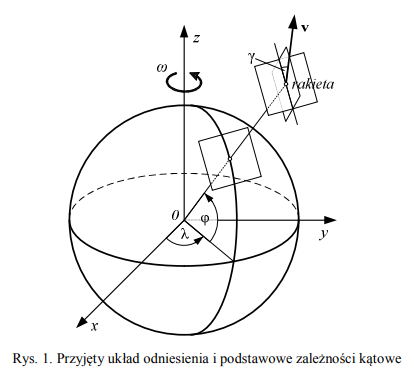

In [9]:
from IPython.display import Image

Image("rys1.png")
# źródło : [1]
#Image("rys1a.png")
# źródło : [2]




In [8]:
from IPython.display import Video
Video("rakieta.mp4")

jak obliczamy

mamy uproszczony model, zależny od:
- parametry : ...


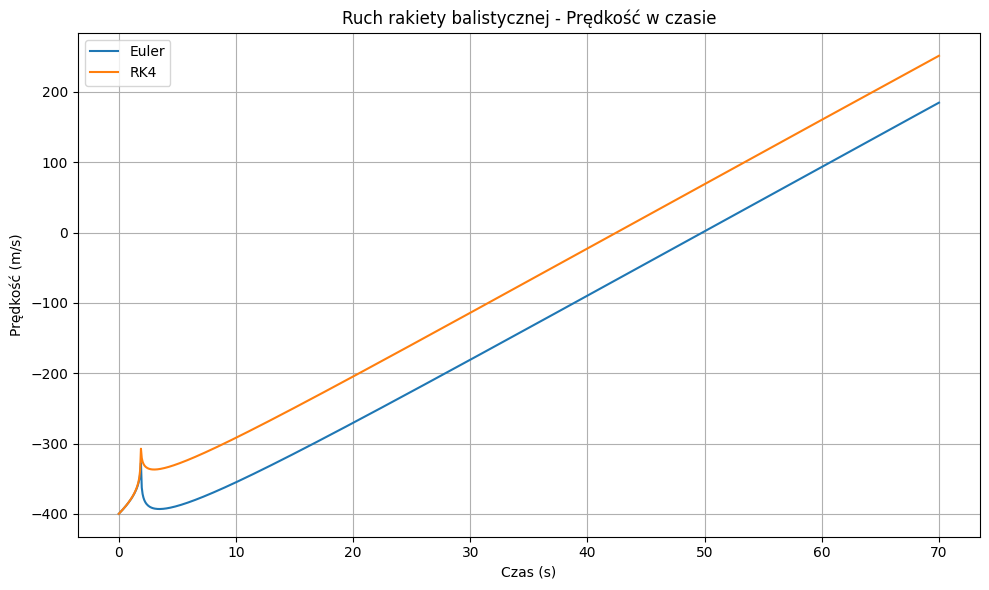

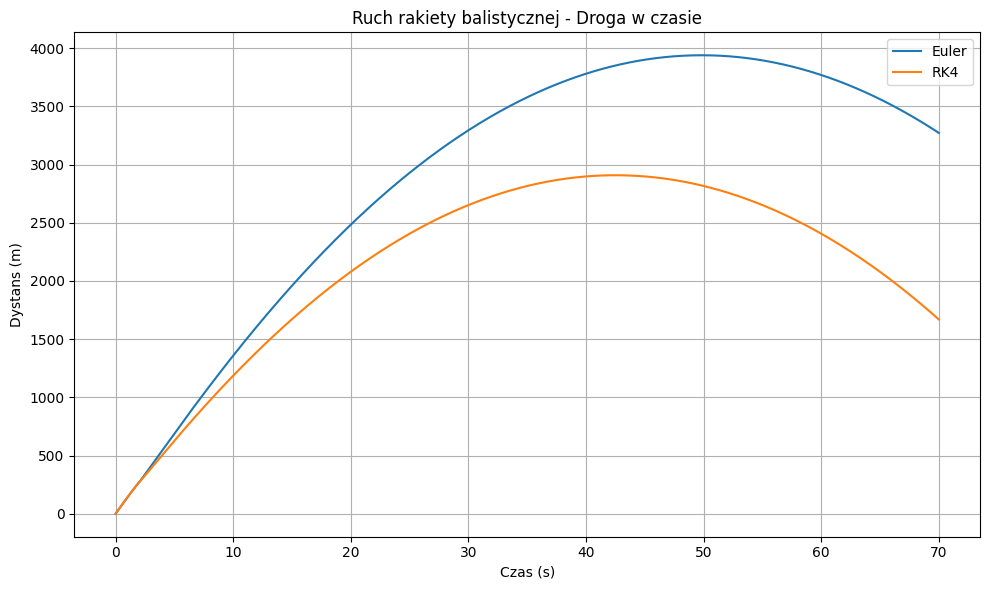

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Funkcja opisująca równanie ruchu rakiety balistycznej
def rocket_equation(y, t, Cd, A, rho, g, mass_function):
    theta = np.radians(90)-1.01*t
    v, theta, m = y
    dvdt = (-m * g * np.sin(theta) - 0.5 * rho * v**2 * Cd * A) / m
    dthetadt = 0
    dmdt = -mass_function(t)  # Zmiana masy w czasie
    return np.array([dvdt, dthetadt, dmdt])

# Funkcja opisująca równanie drogi
def path_equation(y, t, Cd, A, rho, g):
    v, theta, m = y
    dsdt = v * np.cos(theta)
    return dsdt

# Metoda Eulera
def euler_method(rocket_eq, path_eq, y0, t, Cd, A, rho, g, mass_function):
    n = len(t)
    dt = t[1] - t[0]
    y = np.zeros((n, len(y0)))
    s = np.zeros(n)
    y[0] = y0
    for i in range(1, n):
        y[i] = y[i-1] + dt * rocket_eq(y[i-1], t[i-1], Cd, A, rho, g, mass_function)
        s[i] = s[i-1] + dt * path_eq(y[i-1], t[i-1], Cd, A, rho, g)
    return s, -y[:, 0]

# Metoda Rungego-Kutty (RK4)
def runge_kutta_method(rocket_eq, path_eq, y0, t, Cd, A, rho, g, mass_function):
    n = len(t)
    dt = t[1] - t[0]
    y = np.zeros((n, len(y0)))
    s = np.zeros(n)
    y[0] = y0
    for i in range(1, n):
        k1 = dt * rocket_eq(y[i-1], t[i-1], Cd, A, rho, g, mass_function)
        k2 = dt * rocket_eq(y[i-1] + 0.5*k1, t[i-1] + 0.5*dt, Cd, A, rho, g, mass_function)
        k3 = dt * rocket_eq(y[i-1] + 0.5*k2, t[i-1] + 0.5*dt, Cd, A, rho, g, mass_function)
        k4 = dt * rocket_eq(y[i-1] + k3, t[i-1] + dt, Cd, A, rho, g, mass_function)
        y[i] = y[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
        s[i] = s[i-1] + dt * path_eq(y[i-1], t[i-1], Cd, A, rho, g)
    return s, -y[:, 0]

# Funkcja zmiany masy w czasie
def mass_function(t):
    if 2800 - 57 *t >=0:
        return 5900-(2800-57*t)
    else:
        return 3100

# Parametry rakiety
Cd = 0.5
A = 1.0
rho = 1.2
g = 9.81

# Warunki początkowe
initial_velocity = 400
initial_angle = np.radians(69)
initial_mass = 5900.0
initial_conditions = np.array([initial_velocity, initial_angle, initial_mass])

# Czas symulacji
t = np.linspace(0, 70, 1000)

# Rozwiązanie równania ruchu numerycznie - Metoda Eulera
solution_euler, velocity_euler = euler_method(
    rocket_equation, path_equation, initial_conditions, t, Cd, A, rho, g, mass_function
)

# Rozwiązanie równania ruchu numerycznie - Metoda Rungego-Kutty (RK4)
solution_rk4, velocity_rk4 = runge_kutta_method(
    rocket_equation, path_equation, initial_conditions, t, Cd, A, rho, g, mass_function
)

# Wykres prędkości w czasie
plt.figure(figsize=(10, 6))

plt.plot(t, velocity_euler, label='Euler')
plt.plot(t, velocity_rk4, label='RK4')
plt.xlabel('Czas (s)')
plt.ylabel('Prędkość (m/s)')
plt.title('Ruch rakiety balistycznej - Prędkość w czasie')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Wykres drogi w czasie
plt.figure(figsize=(10, 6))

plt.plot(t, solution_euler, label='Euler')
plt.plot(t, solution_rk4, label='RK4')
plt.xlabel('Czas (s)')
plt.ylabel('Dystans (m)')
plt.title('Ruch rakiety balistycznej - Droga w czasie')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Poniżej widać wyniki naszej symulacji dla różnych parametrów:

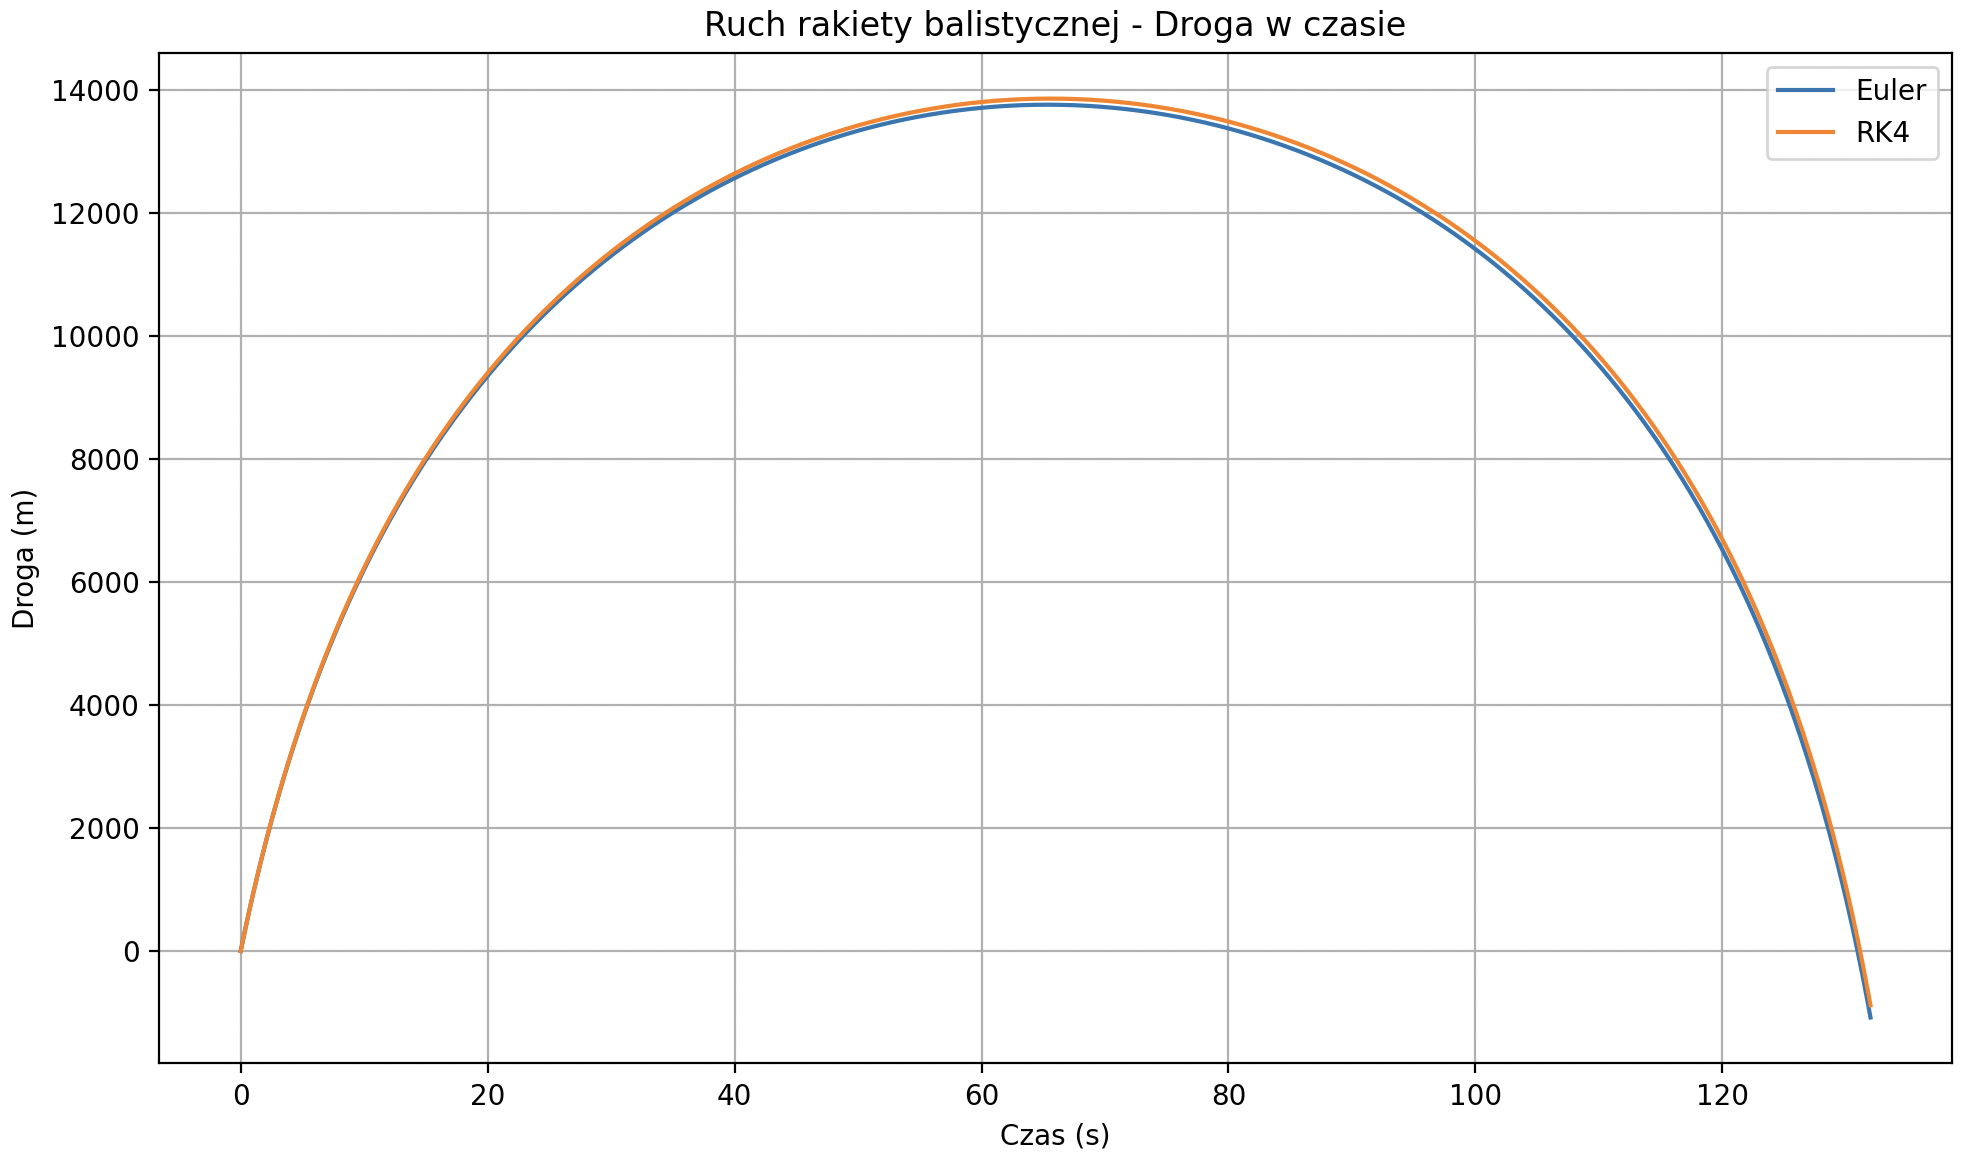

In [22]:
Image("wykres_droga2.png")

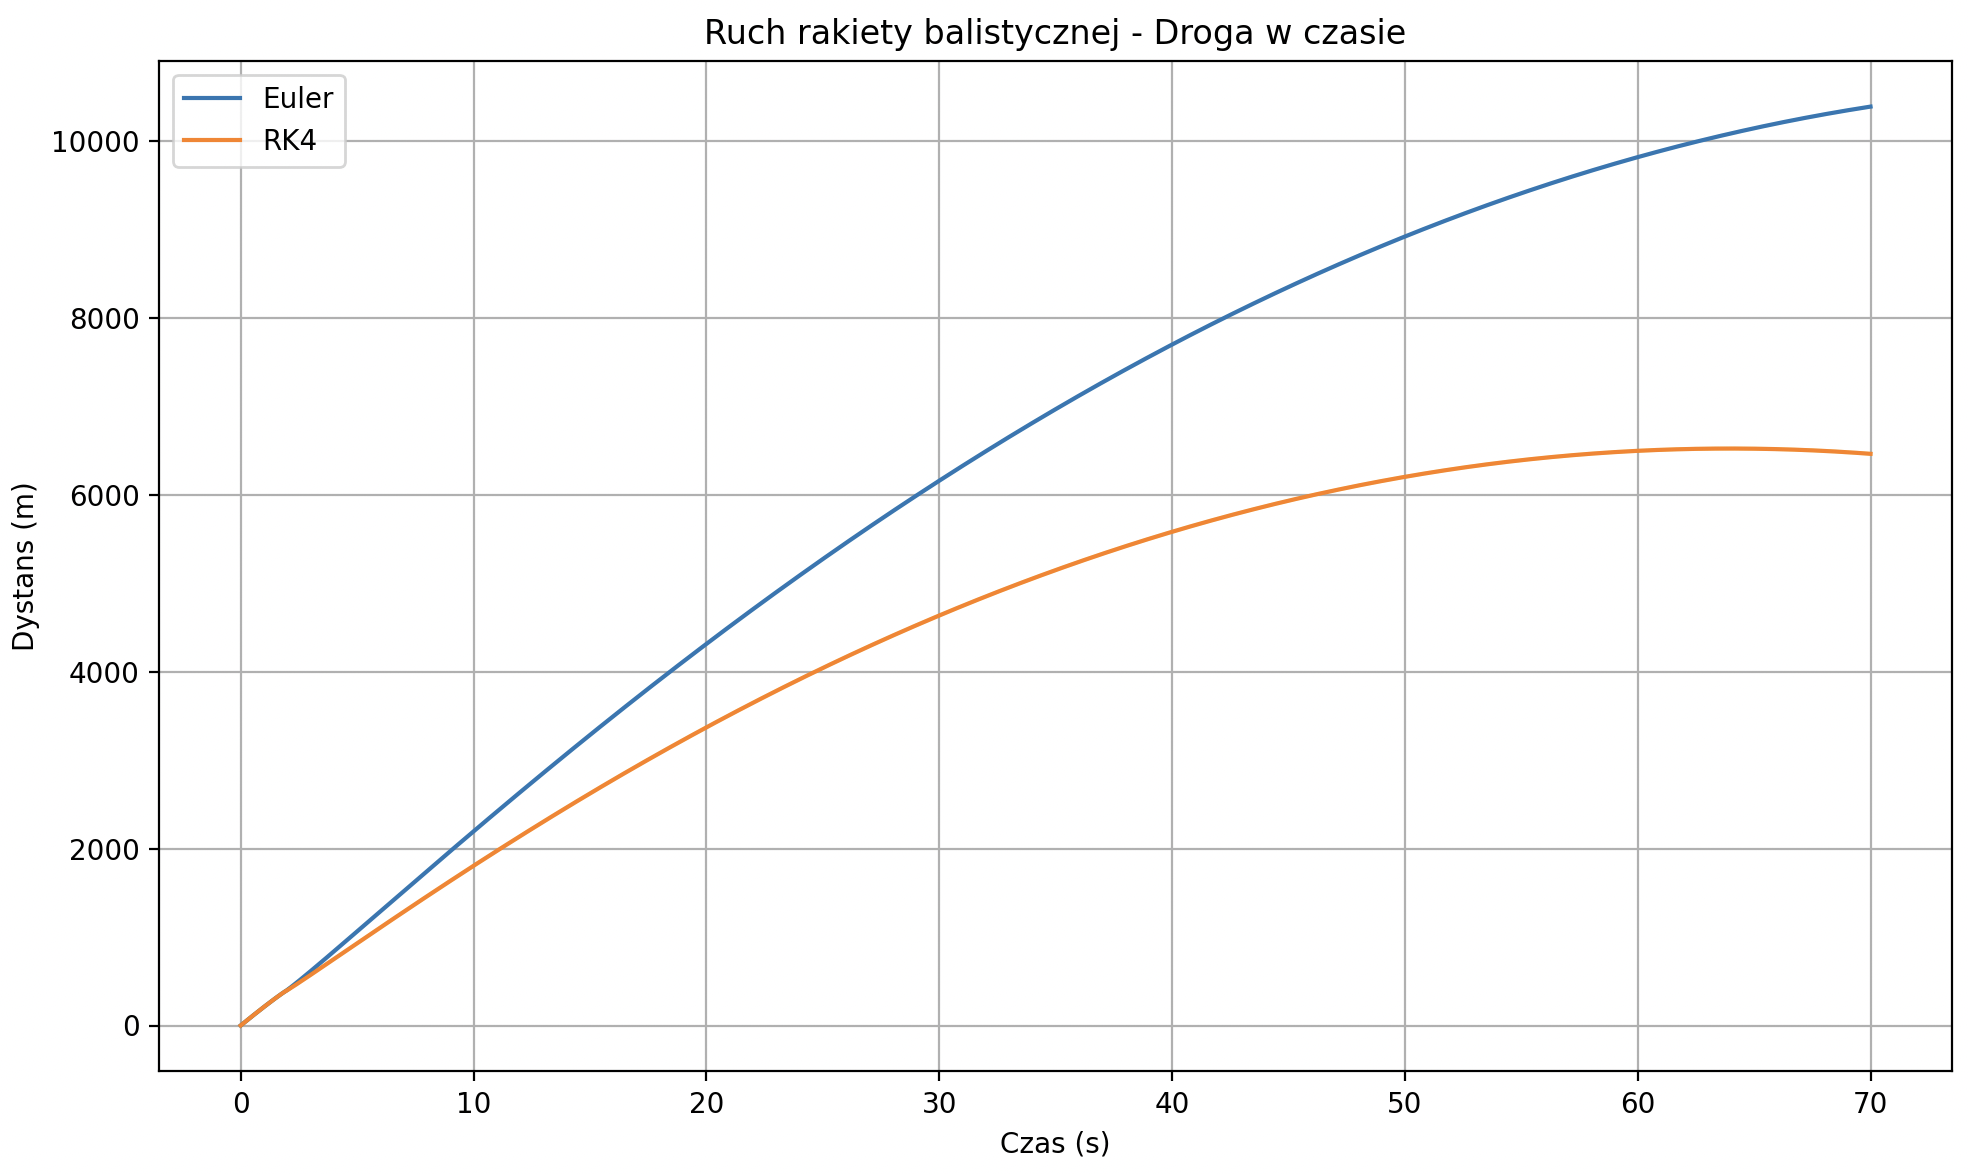

In [23]:
Image("wykres_droga.png")

W artykułach [[1,5](#bibliografia)] został poruszony problem modelowania rakiety, a oto ich metoda oraz wyniki.

**z tego pierwszego artykułu**

[to będzie później]
Możliwe wykorzystanie modelu matematycznego : 
- do wyznaczania parametrów lotu rakiet balistycznych,
- do określania możliwości bojowych rakiet balistycznych, a tym samym szacowania 
stref rażenia i obszarów ryzyka,
- jako generatora danych wejściowych dla algorytmów symulacyjnych śledzenia 
i predykcji trajektorii rakiet balistycznych. [[1](#bibliografia)]

W artykule [[1](#bibliografia)] przedstawiono model matematyczny lotu rakiety balistycznej w centralnym polu grawitacyjnym, opracowany z wykorzystaniem notacji macierzowej.
Model uwzględnia trzy charakterystyczne dla rakiet balistycznych fazy lotu: 
- startową (ang. boost phase), 
- środkową (ang. midcourse phase) i 
- terminalną (ang. terminal phase) 

oraz wpływ oddziaływania atmosfery i sił pozornych na ruch 
rakiet w przestrzeni. (siła odśrodkowa i Coriolisa)

Obliczenia trajektorii lotu rakiety balistycznej prowadzone są w kartezjańskim układzie 
współrzędnych, przedstawionym na rys. 1. Początek tego układu pokrywa się ze środkiem 
Ziemi, oś z skierowana jest do góry i przechodzi przez biegun północny, zaś osie x i y  leżą w płaszczyźnie równika, przy czym x przechodzi przez południk 0° (Greenwich). Przyjęty układ odniesienia jest układem nieinercjalnym, obraca się 
z prędkością kątową $\omega$ względem osi z, co implikuje konieczność uwzględnienia w rozważaniach sił: odśrodkowej i Coriolisa. Na potrzeby obliczeń zakłada się ponadto, że 
powierzchnia planety jest idealną sferą, zaś Ziemia charakteryzuje się następującymi 
parametrami fizycznymi: promieniem $R = 6,37·10^6 \ m$, masą $M = 5,97·10^{24}\ kg$ i prędkością obrotową $ω = 7,29·10^{-5} \frac{rad}{s} $. Wartość stałej grawitacyjnej wynosi $G = 6,67·10^{-11} \frac{m^3}{kg \cdot s}$.


W każdej fazie wykorzystywany jest inny model matematyczny.

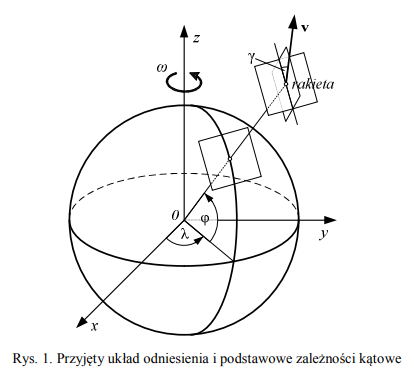

In [13]:
from IPython.display import Image

Image("rys1.png")

W  modelu przedstawionym w artykule [[1](#bibliografia)] traktujemy rakietę jako punkt materialny o 3 stopniach swobody (ignorujemy stopnie swobody związane z obrotai w przestzreni). Wtedy przyspieszenie można przedstawić jako sumę:
$$
    \ddot{r} = \dot{v} =  a_T + a_C + a_D + a_A 
$$,
gdzie : 

$
r -\text{wektor położenia rakiety balistycznej} \\
v - \text{wektor prędkości rakiety balistycznej} \\
a_T - \text{wektor przyspieszenia związany z ciągiem silnika rakietowego} \\
a_C - \text{wektor przyspieszenia sterującego} \\
a_D - \text{wektor przyspieszenia związany z oporem atmosfery} \\
a_G - \text{wektor przyspieszenia grawitacyjnego} \\
a_A - \text{wektor przyspieszenia pozornego (odśrodkowego i Coriolisa)} 
$ 

Przyspieszenie związane z oporem powietrza (poniżej 100 km od powierzchni Ziemi) można opisać wzorem:

$$ a_D = - \frac{\rho_0 e^{-kh}c_D S}{2(m_0 - \int_0^{t_b} \dot{m_f} \operatorname{d}\!t)g}||v||v
$$,
gdzie:

$\rho_0 = 1,22 kg/m^3 - \text{gęstość atmosfery na wysokości 0 m n.p.m.,} \\
k = 0,14141\cdot 10^{-3} m^{-1} \text{ - współczynnik} \\
h - \text{wysokość lotu rakiety} \\
c_D - \text{współczynik oporu aerodynamicznego kadłuba} \\
S - \text{powierzchnia charakterystyczna} \\
m_0 - \text{masa stratowa rakiety} \\
\dot{m_f} - \text{wydatek masy paliwa} \\
t_b - \text{ czas pracy silnika rakietowego} \\
g - \text{przyspieszenie ziemskie}
$ 

Przyspieszenie grawitacyjne rakiety przedstawiono jako:

$$ a_G = - \frac{GMr}{||r||^3} $$

przyspieszenie pozorne :

$$ a_A = -2(\omega \times v)-\omega (\omega \times r) $$

przyspieszenie od siły ciągu:

$$ a_T = \frac{T}{(m_0 - \int_0^{t_b} \dot{m_f} \operatorname{d}\!t)} \frac{v}{||v||} $$

gdzie: $ T $ - ciąg silnika rakietowego,

a wektor przyspieszenia sterującego opisano jako:

$$ a_C = \frac{aT}{2}\left[1+\cos\left(\frac{\pi t}{t_b - t_v}\right)\right]\delta $$

gdzie:

$\delta$ - jednostkowy wektor sterujący,

$a$ - współczynnik korygujący,

$t_b$ - czas pracy silnika rakietowego,

$t_v$ - czas lotu pionowego,

co zapewnia płynną regulację kąta pochylenia $\gamma$ wektora prędkości w chwili wyłączenia napędu, co pokazano na rysunku 2 [[1](#bibliografia)].

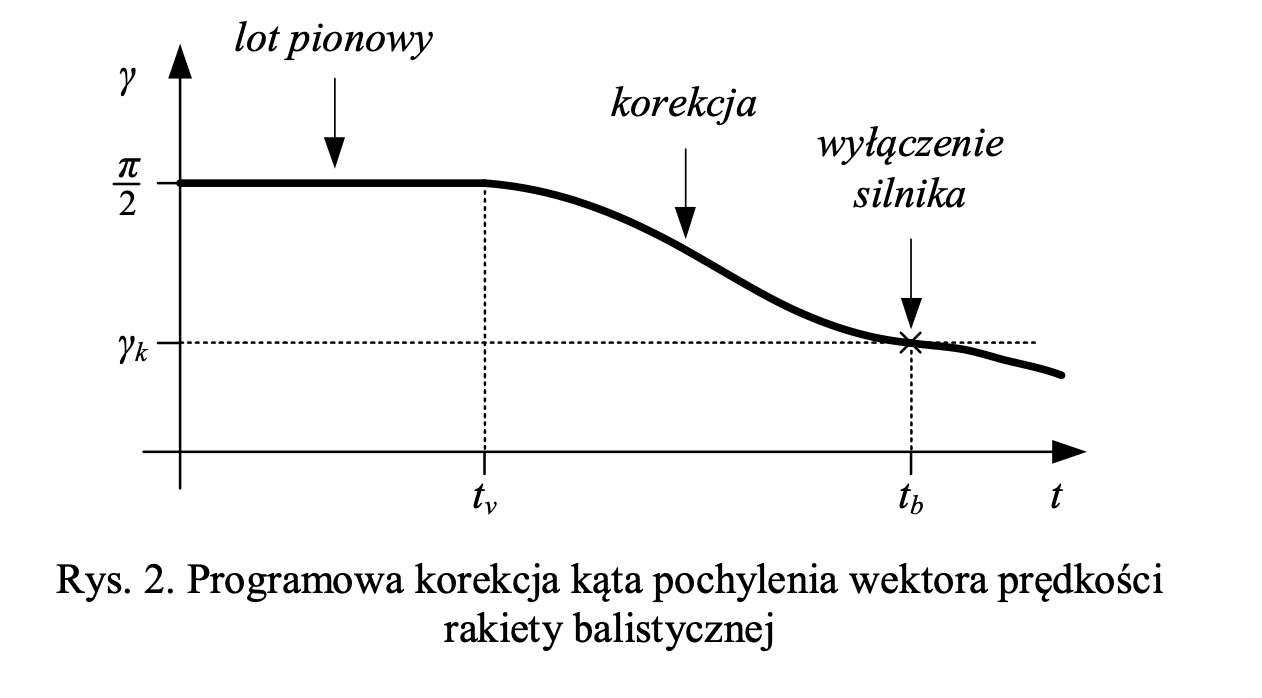

In [16]:
Image("rys.2.png")

Po wprowadzeniu wektora $x$ (składającego się z vektorów r i v) oraz wektora sterowaniu $u$ (składający się z wektora zerowego oraz wektora sygnału sterowania) i przedstawienia zależności 
$$
\ddot{r} = \dot{v} =  a_T + a_C + a_D + a_A 
$$,
w notacji macierzowej: $$\dot{x}=A_ix+Bu$$ uzyskano równania macierzowe opisujące lot rakiety balistycznej, różniące się w zależności od etapu. Za model fizyczny posłużyła rakieta 8K14 systemu 9K72 *Elbrus*. Typowe osiągi rakiet tego typu oraz wyniki symulacji przedstawiono na poniższych wykresach[[1](#bibliografia)]:

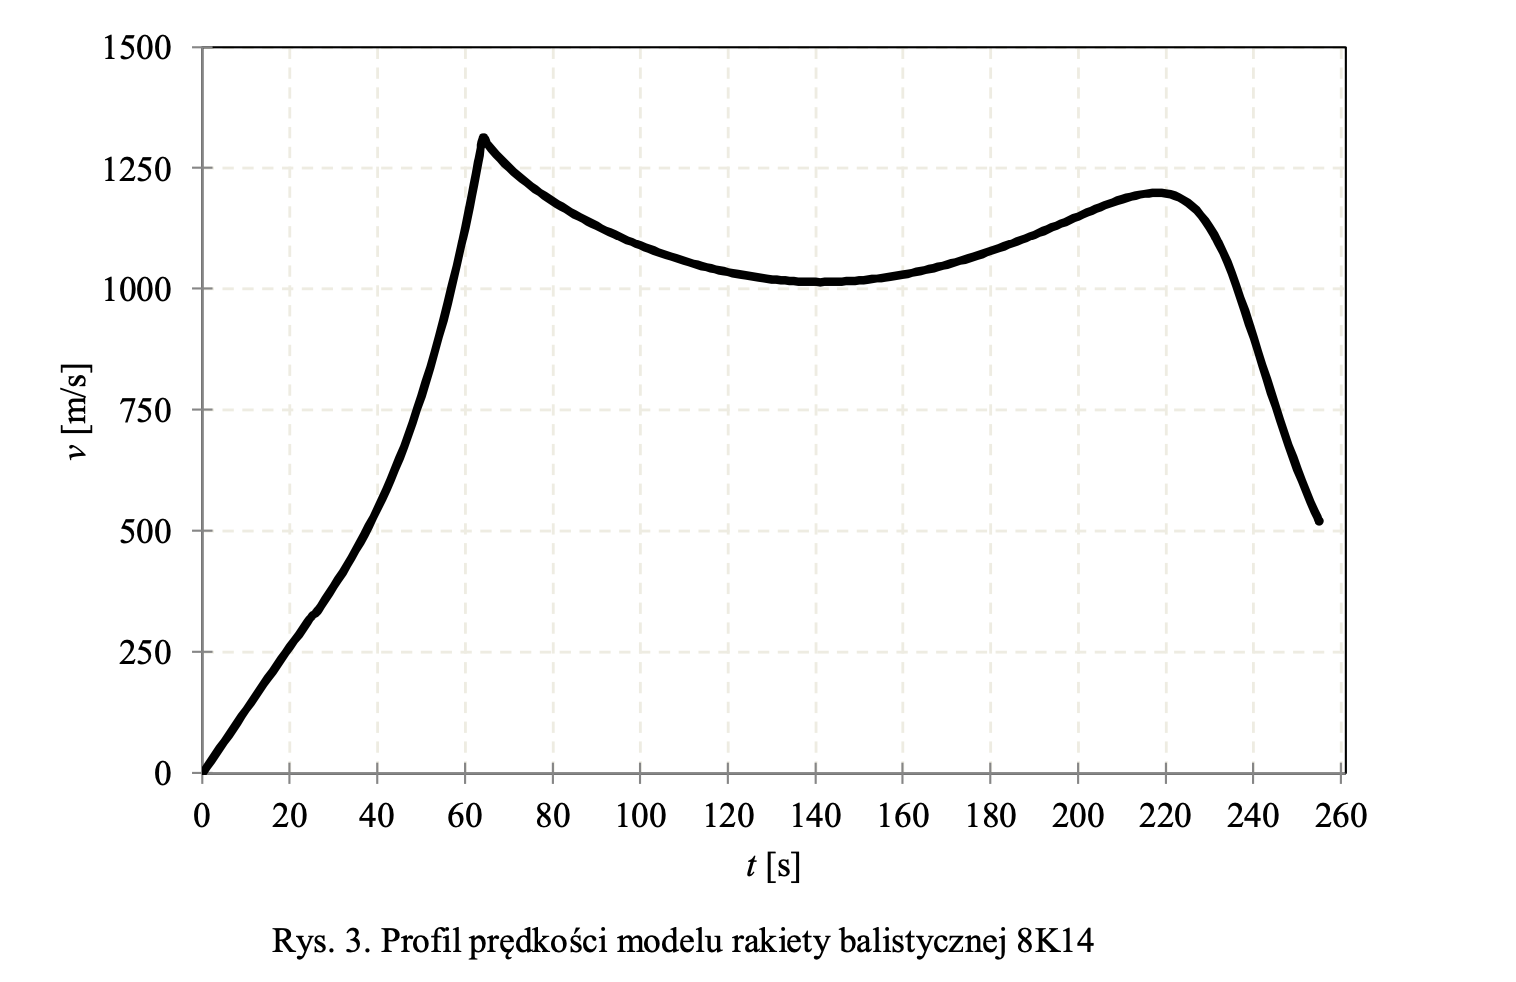

In [17]:
Image("rys.3.png")

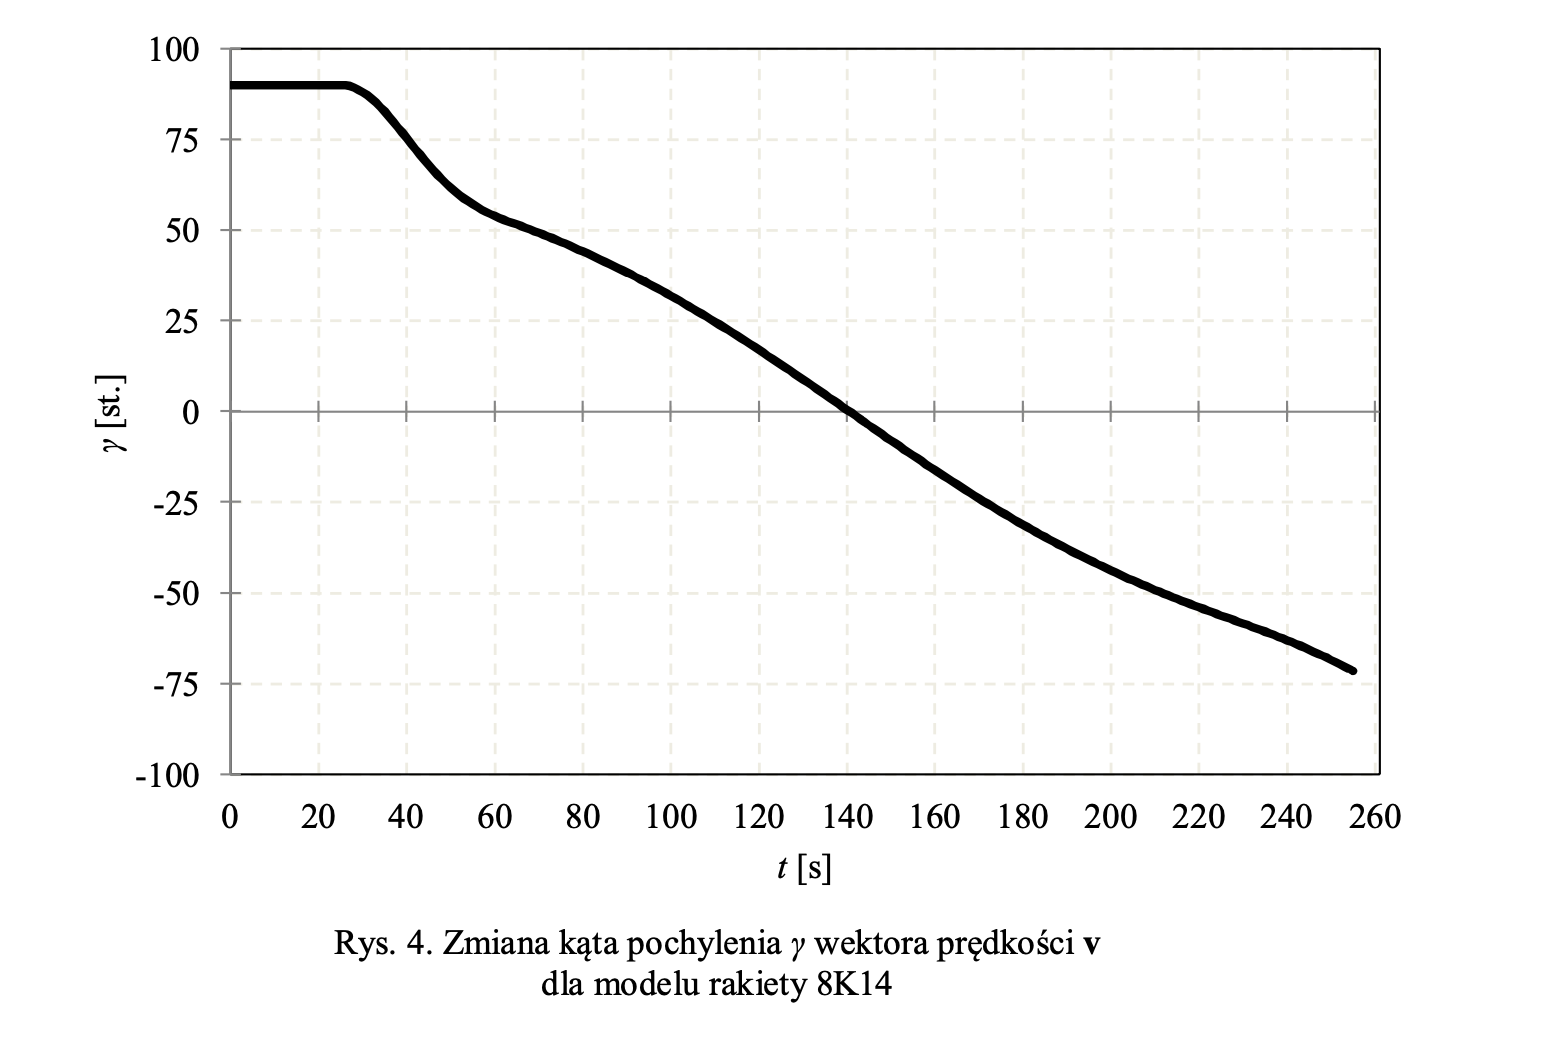

In [18]:
Image("rys.4.png")

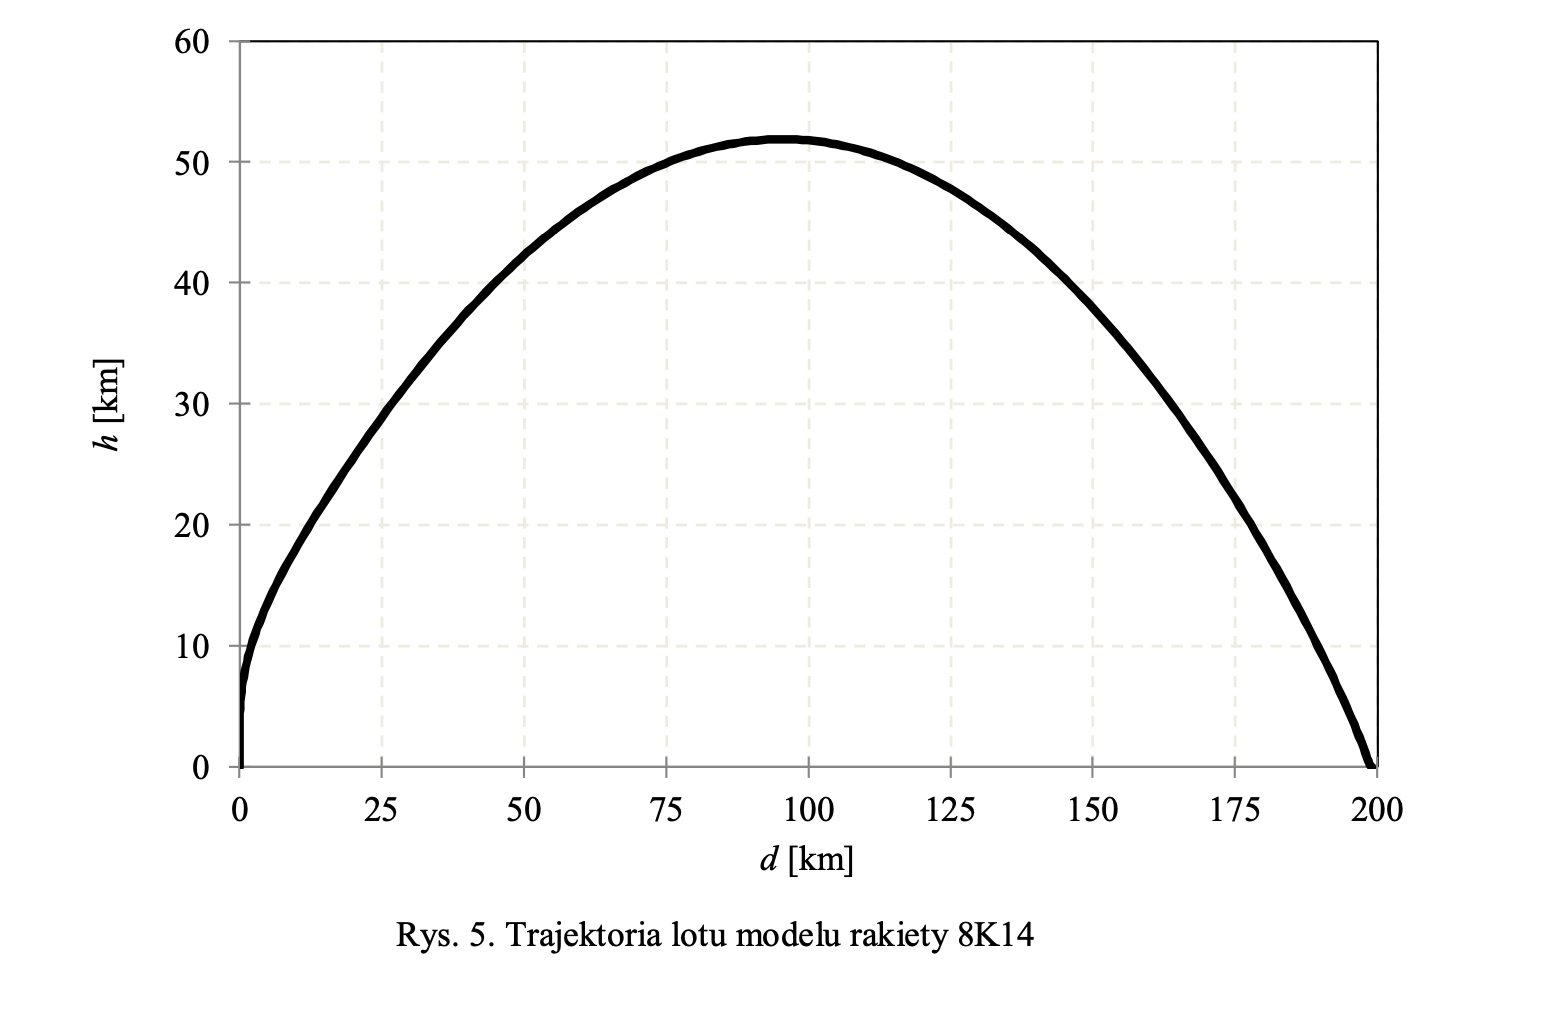

In [19]:
Image("rys.5.png")

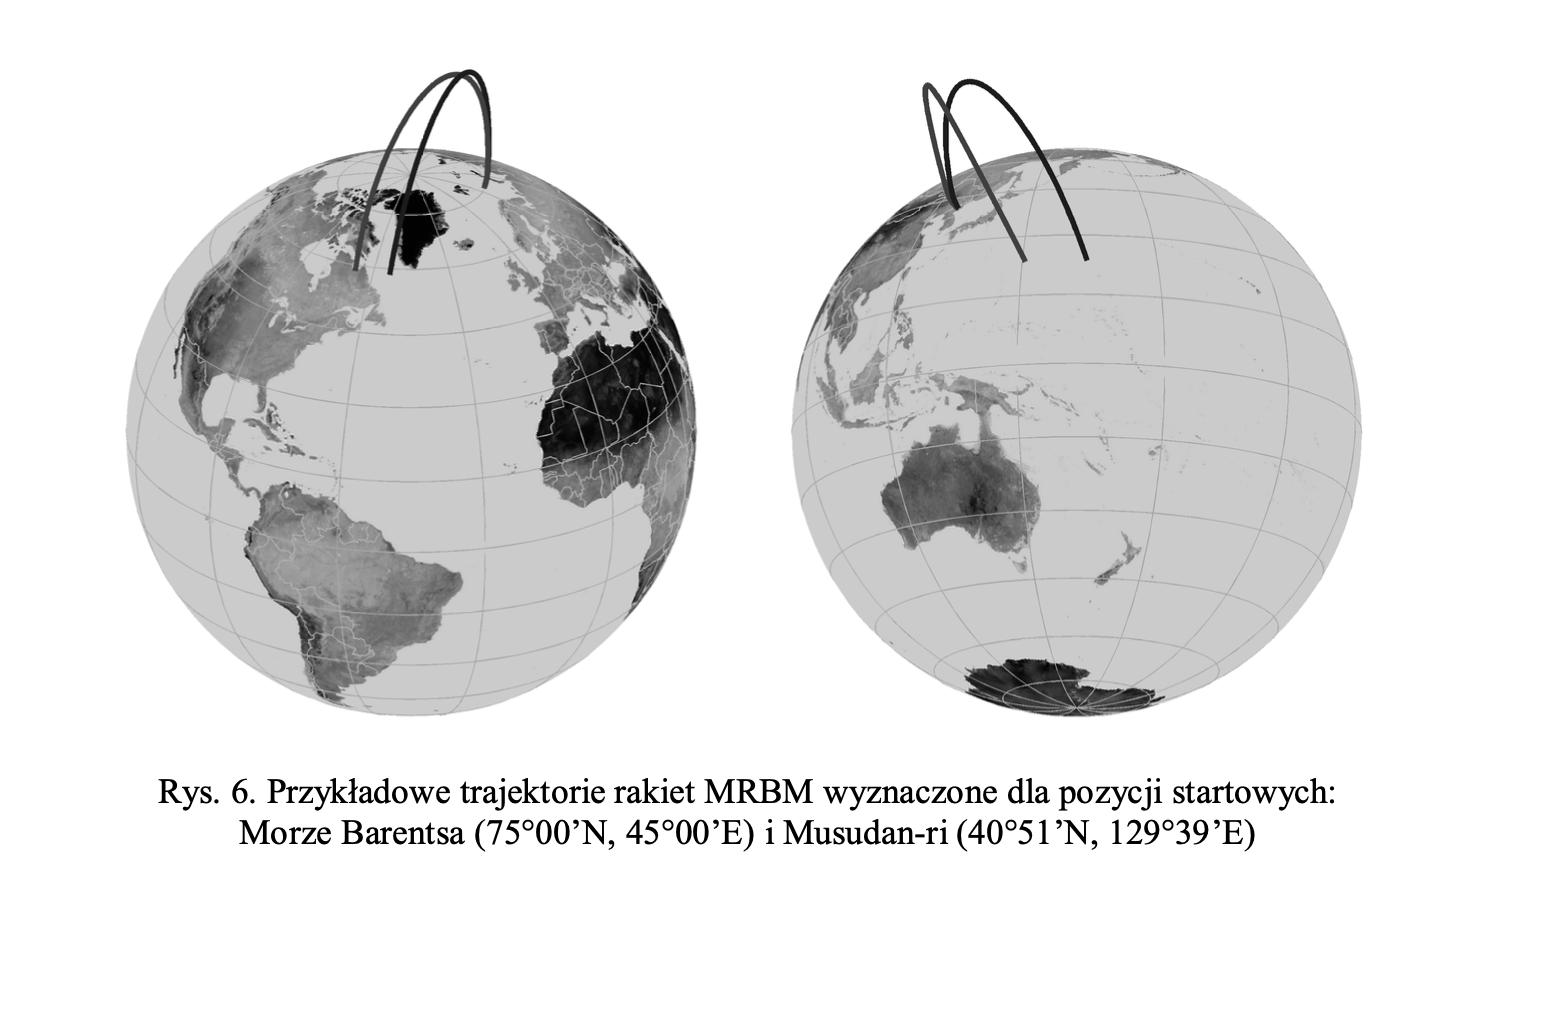

In [20]:
Image("rys.6.png")

### Bibliografia

<a>[1] mgr inż. Witold Bużantowicz, *Modelowanie trajektorii lotu rakiety balistycznej w centralnym polu grawitacyjnym*, Wojskowa Akademia Techniczna</a> 

<a>[2]  Benavoli A., Chisci L., Farina A.: *Tracking of Ballistic Missile with A-Priori Information, IEEE Transactions on Aerospace and Electronic Systems*, Vol. 43, Issue 3, 2007, pp. 1000-1016.</a>

<a>[3]  Cooperman R.L.: *Tactical Ballistic Missile Tracking using the Interacting Multiple Model Algorithm, Proc. of the 5th International Conference on Information Fusion*, Annapolis, 7-11 July 2002, pp. 824-831.</a>

<a>[4]  Zarchan P.: *Tactical and Strategic Missile Guidance*, Washington 2012</a>

<a>[5] Ruiping JI, Yan LIANG, Linfeng XU, Zhenwei WEI: *Trajectory prediction of ballistic missiles using Gaussian process error model*, Received 25 December 2020, Revised 2 February 2021, Accepted 17 March 2021, Available online 26 May 2021, Version of Record 29 December 2021.</a>

<a href="https://histmag.org/Wernher-von-Braun-SS-man-podbija-Ksiezyc-22082" id="6">[6] Natalia Pochroń *Wernher von Braun: SS-man podbija Księżyc*, opublikowano: 2021-03-03 15:01</a>

<a href="https://www.youtube.com/watch?v=PvRufvvL24s" id="7">[7] ciekawehistorie (kanał na YouTube) *Wernher Von Braun - od SS do NASA*</a>
